In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
x = np.linspace(0, 1, 1000)
N, dx = len(x), np.diff(x)[0]

def potential(x):
    return 40000 * (x - 0.5) ** 2

In [33]:
A = (1/dx**2) * (np.diag(np.ones(N - 1), 1) - 2 * np.diag(np.ones(N)) + np.diag(np.ones(N - 1), -1))
B = (1/12) * ((np.diag(np.ones(N - 1), 1) + 10 * np.diag(np.ones(N)) + np.diag(np.ones(N - 1), -1)))
V = np.diag(potential(x))

M = np.linalg.solve(B, A) # computes Binv @ A efficiently

In [53]:
E, vecs = np.linalg.eig(-M + V)
idx = E.argsort()
E = E[idx]
vecs = vecs[:, idx]

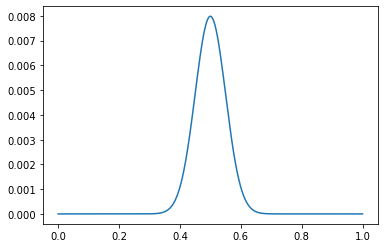

In [54]:
plt.plot(x, np.abs(vecs.T[0]) ** 2)

(-36.754376723524636, 1038.4343344757076)

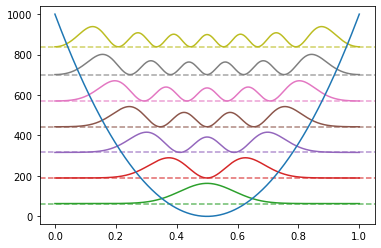

In [7]:
for i in range(7):
    wf = np.abs(vecs.T[i]) ** 2
    plt.plot(x, E[i] + (0.1 * (np.max(V)/np.max(wf)) * wf), c = f"C{i + 12}")
    plt.axhline(E[i], c = f"C{i + 12}", ls = "dashed", alpha = 0.7, label = f"{i}")

plt.plot(x, potential(x))
plt.ylim([E[0] - 0.1 * np.max(V), E[i] + 0.2 * np.max(V)])

In [56]:
x = np.array([5, 4, 3, 2, 1])
x.argsort()

array([4, 3, 2, 1, 0], dtype=int64)